## ПРОЕКТ: Исследование продаж компьютерных игр

### Описание проекта

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируем ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Описание данных

- ***Name*** - название игры
- ***Platform*** - платформа
- ***Year_of_Release*** — год выпуска
- ***Genre*** — жанр игры
- ***NA_sales*** — продажи в Северной Америке (миллионы проданных копий)
- ***EU_sales*** — продажи в Европе (миллионы проданных копий)
- ***JP_sales*** — продажи в Японии (миллионы проданных копий)
- ***Other_sales*** — продажи в других странах (миллионы проданных копий)
- ***Critic_Score*** — оценка критиков (максимум 100)
- ***User_Score*** — оценка пользователей (максимум 10)
- ***Rating*** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Цель исследования

Выявить закономерности, определяющие успешность компьютерной игры, основываясь на исторических данных о продажах игр, оценке пользователей и экспертов, жанрах и платформах (например, Xbox или PlayStation), с целью определения потенциально популярного продукта и планирования рекламной кампании.

### Ход исследования

1. Загрузка и изучение общей информации о полученном датафрейме;
2. Подготовка данных:
    - Корректировка наименований;
    - Обработка пропусков;
    - Преобразование типов данных;
    - Расчет суммарных продаж.
3. Исследовательский анализ данных:
    - Анализ данных по периодам;
    - Анализ данных по платформам;
    - Анализ данных по жанрам.
4. Портрет пользователя по регоинам
5. Проверка гипотез:
    - Рейтинги платформ;
    - Рейтинги жанров.
6. Общий вывод: Резюмирование полученных результатов, формулировка выводов и рекомендаций 


## ИМПОРТ БИБЛИОТЕК

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

## ОБЩАЯ ИНФОРМАЦИЯ О ДАННЫХ

In [2]:
try:
    games = pd.read_csv('/datasets/games.csv')
except:
    games = pd.read_csv(r'D:\datasets\games.csv')

In [3]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
games.shape[0]

16715

In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**ВЫВОД:**

1. Анализируемый датафрейм содержит 16715 строк. 
2. Обнаружены пропуски в 6-ти колонках:
    - ***Name*** - название игры
    - ***Year_of_Release*** - год выпуска
    - ***Genre*** - жанр игры
    - ***Critic_Score*** - оценка критиков
    - ***User_Score*** - оценка пользователей
    - ***Rating*** - рейтинг от организации ESRB
3. Требуется изменить тип данных в столбце:
    - ***Year_of_Release*** — год выпуска
4. Требуется привести к нижнему регистру наименования в таблице


## ПРЕДОБРАБОТКА ДАННЫХ

### Замена названий столбцов (приведение к нижнему регистру)

In [6]:
games.columns = games.columns.str.lower()

In [7]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Обработка пропусков

In [8]:
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [9]:
pd.DataFrame(round(games.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,1.600000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.300000
user_score,40.100000


Удалим:

- 2 пропуска в столбце ***name*** - название игры
- 2 пропуска в столбце ***genre*** - жанр игры
- 269 пропусков в столбце ***year_of_release*** — год выпуска

In [10]:
games = games.dropna(subset = ['name', 'genre', 'year_of_release'])

Количество пропусков в столбцах ***сritic_score*** - оценка критиков (8578), ***user_score*** - оценка пользователей (6701) составляет 40-50% строк датафрейма. Замена такого количества данных на медианные значения может повлиять на объективность картины по данным показателям. Удалять строки так же нельзя. 
Проведем замену пропусков на "-1".

In [11]:
games['critic_score'] = games['critic_score'].fillna(-1)
games['user_score'] = games['user_score'].fillna(-1)

Количество пропусков в столбце ***rating*** - рейтинг от организации ESRB(6766) более 40% строк датафрейма. Замена такого количества данных на медианные значения может повлиять на объективность картины по данным показателям. Удалять строки так же нельзя. Проведем замену пропусков на "unknown".

In [12]:
games['rating'] = games['rating'].fillna('unknown')

In [13]:
games.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

**ВЫВОД:**

Пропуски в исходном датафрейме обработаны. На данном этапе отсутствуют.

### Преобразование данных в нужные типы

In [14]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


В столбце ***year_of_release*** — год выпуска тип данных - float64. Преобразуем в int.

In [15]:
games['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000., 1995., 1991., 1981., 1987., 1980.,
       1983.])

In [16]:
games['year_of_release'] = (games['year_of_release']).astype('int')

In [17]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  object 
 10  rating           16444 non-null  object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


In [18]:
games['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983])

Тип данных в столбце ***year_of_release*** — год выпуска теперь корректный

В столбце ***critic_score*** — оценка критиков тип данных - float64. Преобразуем в int.

In [19]:
games['critic_score'].unique()

array([76., -1., 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [20]:
games['critic_score'] = (games['critic_score']).astype('int')

In [21]:
games['critic_score'].unique()

array([76, -1, 82, 80, 89, 58, 87, 91, 61, 97, 95, 77, 88, 83, 94, 93, 85,
       86, 98, 96, 90, 84, 73, 74, 78, 92, 71, 72, 68, 62, 49, 67, 81, 66,
       56, 79, 70, 59, 64, 75, 60, 63, 69, 50, 25, 42, 44, 55, 48, 57, 29,
       47, 65, 54, 20, 53, 37, 38, 33, 52, 30, 32, 43, 45, 51, 40, 46, 39,
       34, 41, 36, 31, 27, 35, 26, 19, 28, 23, 24, 21, 17, 13])

Тип данных в столбце ***critic_score*** — оценка критиков теперь корректный

В столбце ***user_score*** - оценка пользователей тип данных - object. Преобразуем в float.

In [22]:
games['user_score'].unique()

array(['8', -1, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [23]:
games[games['user_score'] == 'tbd']['user_score'].value_counts()

tbd    2376
Name: user_score, dtype: int64

В данных оценок пользователей содержится аббревиатура "tbd". 2376 строк. Замена такого количества данных на медианные значения может повлиять на объективность картины по данным показателям. Удалять строки так же нельзя. Проведем замену пропусков на "-1".

In [24]:
games.loc[games['user_score'] == 'tbd', 'user_score'] = -1

In [25]:
games[games['user_score'] == 'tbd']['user_score'].value_counts()

Series([], Name: user_score, dtype: int64)

In [26]:
games['user_score'] = (games['user_score']).astype('float')

In [27]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


Тип данных в столбце ***user_score*** - оценка пользователей теперь корректный

**ВЫВОД:**

В столбце ***year_of_release*** — год выпуска тип данных - float64 преобразован в int.

В столбце ***critic_score*** — оценка критиков тип данных - float64 преобразован в int.

В столбце ***user_score*** - оценка пользователей тип данных - object преобразован  в float.

В данных оценок пользователей содержится аббревиатура "tbd". 2376 строк. Замена такого количества данных на медианные значения может повлиять на объективность картины по данным показателям. Удалять строки так же нельзя. Проведем замену пропусков на "-1".

### Проверка на дубликаты

In [28]:
games.duplicated().sum()

0

In [29]:
games.shape[0]

16444

In [30]:
games[games.duplicated(['name', 'platform', 'year_of_release'])].count()

name               1
platform           1
year_of_release    1
genre              1
na_sales           1
eu_sales           1
jp_sales           1
other_sales        1
critic_score       1
user_score         1
rating             1
dtype: int64

In [31]:
games[games.duplicated(['name', 'platform', 'year_of_release'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83,5.5,E


In [32]:
games = games.drop_duplicates(['name', 'platform', 'year_of_release'])

In [33]:
games[games.duplicated(['name', 'platform', 'year_of_release'])].count()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

**ВЫВОД:**

Явные дубликаты отсутствуют

После предобработки данных осталось 16444 строк в датафрейме.

При поиске неявных дубликатов по столбцам name, platform, year_of_release обнаружен один дубрикат. Принято решение о его удалении.

### Расчет суммарных продаж по регионам

In [34]:
games['total_sales'] = (
    games['na_sales'] + 
    games['eu_sales'] +
    games['jp_sales'] +
    games['other_sales']
)

In [35]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,unknown,31.38


**ВЫВОД:**

Расчитаны суммарные продажи во всех регионах. Добавлен отдельный столбец total_sales.

**ВЫВОД ПО ПРЕДОБРАБОТКЕ ДАННЫХ:**


- Проведена замена наименований столбцов (приведены к нижнему регистру);
- Обработаны пропуски:

        Удалены:

        2 пропуска в столбце name - название игры
        2 пропуска в столбце genre - жанр игры
        269 пропусков в столбце year_of_release — год выпуска

        Проведена замена пропусков на "-1": 
        сritic_score - оценка критиков (8578) 
        user_score - оценка пользователей (6701)
        
        Проведена замена пропусков на "unknown":
        rating - рейтинг от организации ESRB(6766) 
        
    Вероятная причина пропусков - технический сбои при объединении данных из разных источников, отсутствие внесенной информации(человеческий фактор).


- Преобразованы типы данных:

        В столбце year_of_release — год выпуска тип данных - float64 преобразован в int.
        В столбце critic_score — оценка критиков тип данных - float64 преобразован в int.
        В столбце user_score - оценка пользователей тип данных - object преобразован  в float.
    В данных оценок пользователей содержится аббревиатура "tbd". 2376 строк. Замена такого количества данных на медианные значения может повлиять на объективность картины по данным показателям. Удалять строки так же нельзя. Проведем замену пропусков на "-1".
    
    
- Проведена проверка на дубликаты. Явные дубликаты отсутствуют

- Расчитаны суммарные продажи во всех регионах. Добавлен отдельный столбец total_sales.


## ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ

In [36]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,unknown,31.38


### Количество выпускаемых игр по годам

Посмотрим, сколько игр выпускалось в разные годы. Оценим важность данных за все периоды.

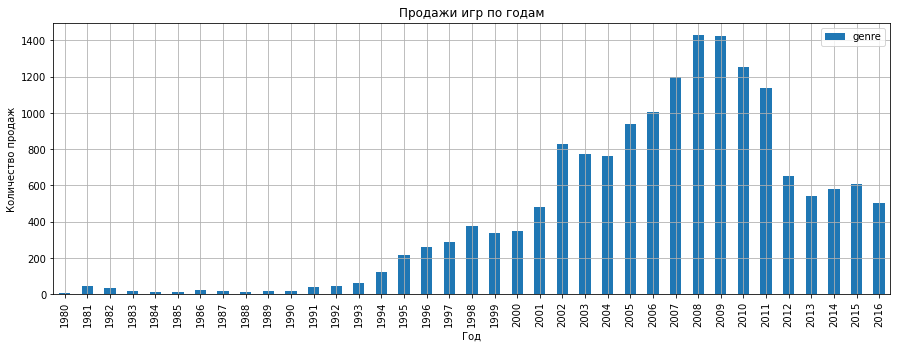

In [37]:
(
    games
    .pivot_table(index = 'year_of_release', values = 'genre', aggfunc = 'count')
    .plot(grid = True, kind = 'bar', figsize = (15, 5))
)

plt.title('Продажи игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество продаж')
plt.show()

In [38]:
games['year_of_release'].describe()

count    16443.000000
mean      2006.485921
std          5.875546
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

**ВЫВОД:**

Рассматриваемый период выпуска игр - с 1980 по 2016 год.
Рост количества выпускаемых игр приходится на 1994 год. И продолжается до выходит на свой максимум в 2008, далее наблюдается спад до 2012 года. После чего количество выпускаемых игр стабилизируется.
Для исследования возьмем период в 7 лет, так как морально и технически устаревшие игры вряд ли сильно заинтересуют потребителя. 

### Количество продаж игр по платформам

Посмотрим, как менялись продажи по платформам.

In [39]:
games_plfm = (
    games
    .pivot_table(index = 'platform', values = 'total_sales', aggfunc = sum)
    .sort_values(by = 'total_sales', ascending = False)
 )

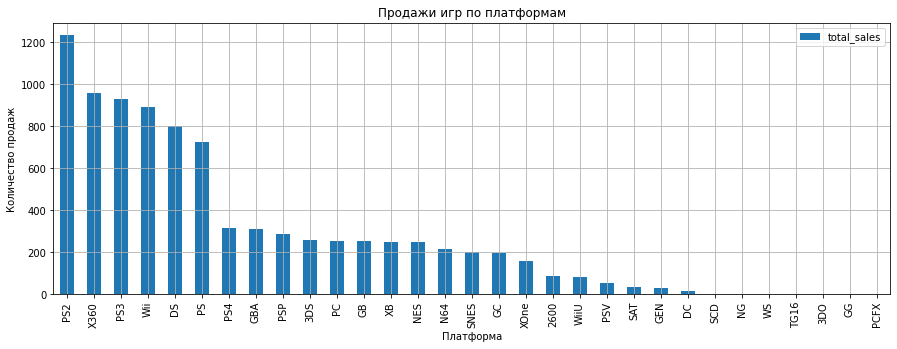

In [40]:
games_plfm.plot(grid = True, kind = 'bar', figsize = (15, 5))

plt.title('Продажи игр по платформам')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж')
plt.show()

Выберем платформы с наибольшими суммарными продажами (PS, DS, Wii, PS3, X360, PS2) и построим распределение по годам.

In [41]:
top_plfm = games_plfm.head(6).reset_index()['platform'].unique()

In [42]:
top_plfm

array(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'], dtype=object)

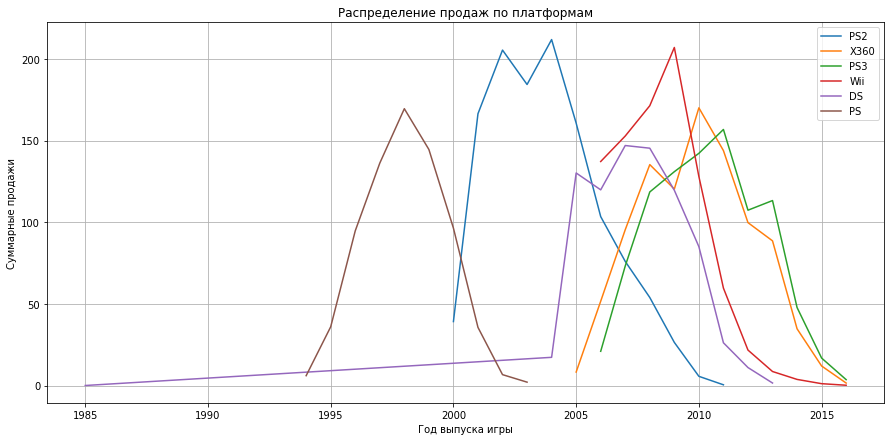

In [43]:
for i in top_plfm:
    (
        games
        .query('platform == @i')
        .pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
        .sort_values('year_of_release', ascending = False)['total_sales']
        .plot(kind='line', grid = True, figsize = (15, 7), label=i)
    )
    
plt.title('Распределение продаж по платформам')
plt.xlabel('Год выпуска игры')
plt.ylabel('Суммарные продажи')
plt.legend() 
plt.show()

Определим актуальный период.

In [44]:
period_plfm = games.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()

In [45]:
period_plfm['act'] = period_plfm['max'] -period_plfm['min'] 

In [46]:
period_plfm.columns = ['platform', 'min_year_of_release', 'max_year_of_release', 'act']

Расчитаем жизненный цикл платформ.

In [78]:
period_plfm.query('platform in ("PS2", "X360", "PS3", "Wii", "DS", "PS")')['act'].median()

10.5

In [48]:
period_plfm.head()

,platform,min_year_of_release,max_year_of_release,act
0,2600,1980,1989,9
1,3DO,1994,1995,1
2,3DS,2011,2016,5
3,DC,1998,2008,10
4,DS,1985,2013,28


Актуальный период приходится на этапы роста и зрелости продукта. Определим его как половину медианного значения срока работы платформ.

In [49]:
act_period = period_plfm['act'].median()/2

In [50]:
act_period

3.0

**ВЫВОД:**

Характерный срок появления новых и исчезновения старых платформ, судя по графикам, 10 лет (на этапе роста и зрелости продукта -5 лет). Таким образом, актуальный период работы всех платформ 3 - 5 лет.

### Выбор потенциально прибыльных платформ

In [51]:
act_slice = games.query('year_of_release >= 2016-@act_period').reset_index(drop = True)

In [52]:
act_slice.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,unknown,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1.0,unknown,14.60
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62


In [53]:
act_plfm = (
    act_slice
    .pivot_table(index = ['platform'], values = 'total_sales', aggfunc = 'sum')
    .sort_values(by = 'total_sales', ascending=False)
    .reset_index()
    .head(5)
)

In [54]:
plat = act_plfm['platform'].unique()

In [55]:
plat

array(['PS4', 'PS3', 'XOne', '3DS', 'X360'], dtype=object)

Получен список из 5-ти потенцально прибыльных платформ: PS4, PS3, XOne, 3DS, X360.

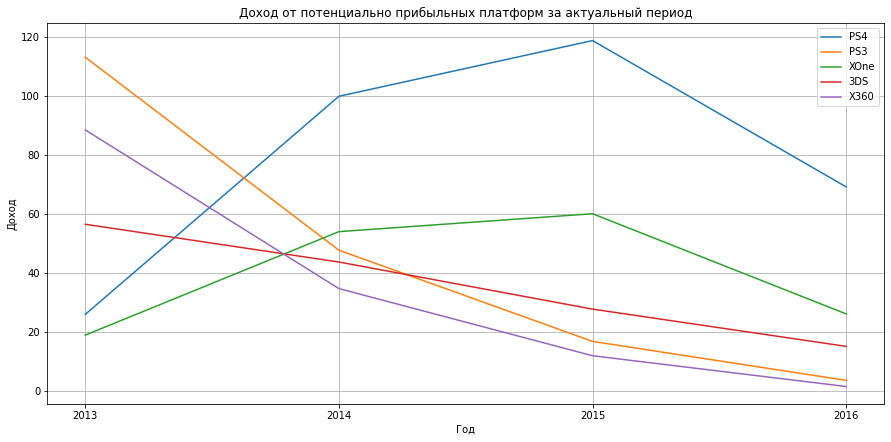

In [56]:
for p in plat:
    (
        act_slice
        .query('platform == @p')
        .pivot_table(index = 'year_of_release', values = 'total_sales',aggfunc = 'sum')
        .sort_values(by = 'year_of_release', ascending=False)['total_sales']
        .plot(x = 'year_of_release', y = 'total_sales',kind='line', grid = True, figsize= (15,7), label= p)
)

plt.title('Доход от потенциально прибыльных платформ за актуальный период')
plt.xticks(np.arange(2013, 2017, step=1))
plt.xlabel('Год')
plt.ylabel('Доход')
plt.legend() 
plt.show()

**ВЫВОД:**

По итогам анализа дохода от продаж игр в актуальном периоде выявлено 5 потенцально прибыльных платформ: 
- PS4
- PS3
- XOne
- 3DS
- X360

Согласно полученному графику в 2016 году наблюдается снижение продаж по всем платформам. Однако тенденция к понижению дохода у платформ PS4 и XOne появилась в 2015 году, в то время как у остальных платформ стойкая тенденция к снижению дохода наблюдается на протяжении всего актуального периода (с 2013 г).

Отнесем к лидерам PS4 и XOne.

### "Ящик с усами" по глобальным продажам игр в разбивке по платформам

In [57]:
act_slice['total_sales'].describe()

count    2233.000000
mean        0.488442
std         1.235226
min         0.010000
25%         0.030000
50%         0.110000
75%         0.400000
max        21.050000
Name: total_sales, dtype: float64

Text(0, 0.5, 'Продажи игр')

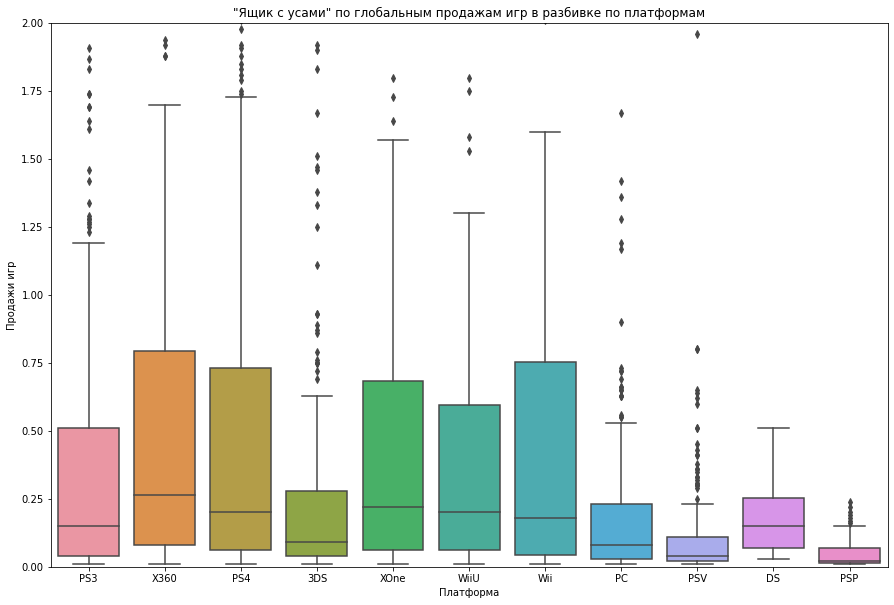

In [58]:
plt.figure(figsize=(15, 10))
ax = sns.boxplot(data = act_slice, x='platform', y='total_sales')
ax.set(ylim=(0,2))
plt.title('"Ящик с усами" по глобальным продажам игр в разбивке по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи игр')

**ВЫВОД:**

Анализ "Ящика с усами" по глобальным продажам игр в разбивке по платформам показал, что можно выделить 2 группы:

1. Наиболее успешные платформы (PS3, PS4, X360, XOne, Wii, WiiU) 
- межквартильный размах в пределах от 0 млн. до 0.75 млн. копий
- Q3 (75% данных) находится близко к 0.75 млн. копий
- максимум около отметки в 1.75 млн. копий

2. Менее успешные платформы
- межквартильный размах продаж игр на большинстве платформ находится в пределах от 0 млн. до 0.5 млн. копий
- Q3 (75% данных) не достигает 0.5млн. копий
- максимальные значения не более 1.1 млн. копий

Судя по многочисленным выбросам, у многих платформ есть десятки очень популярных игр, объемы продаж которых могут достигать более 10 млн. копий.


### Оценка влияния отзывов пользователей и критиков на продажи

 Проведем оценку на примере платформы PS4.

In [59]:
impact_score = (
    act_slice[['platform','critic_score', 'user_score','total_sales']]
    .query('platform == "PS4" and critic_score > -1 and user_score > -1')
)

Построим попарные диаграммы рассеяния для всх столбцов датафрейма

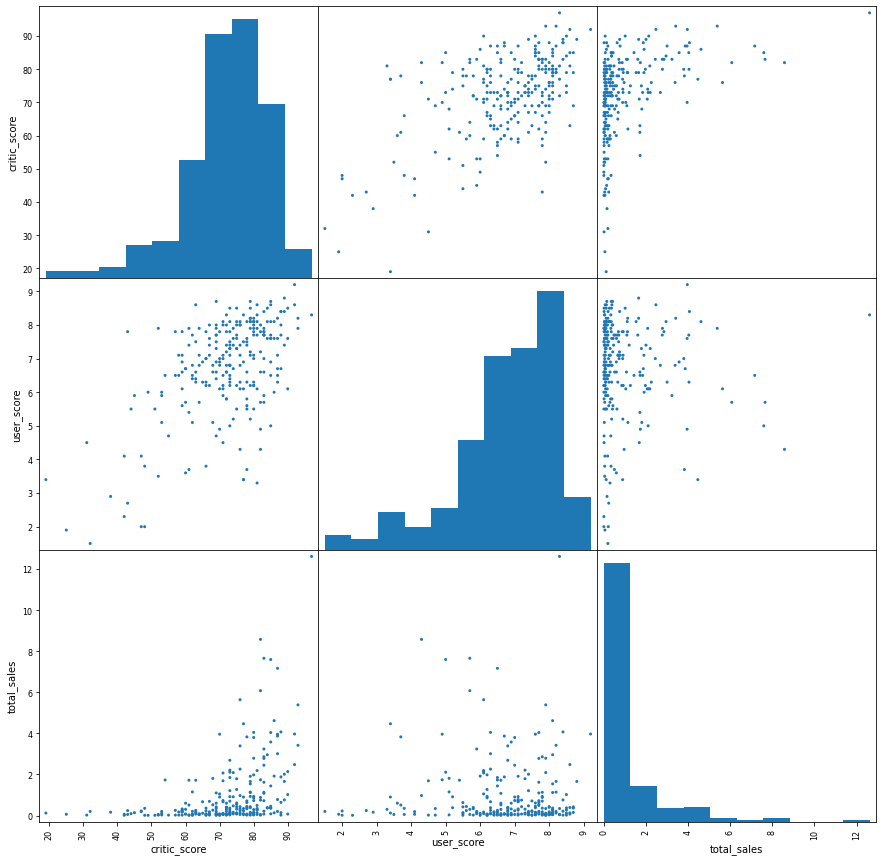

In [60]:
pd.plotting.scatter_matrix(impact_score, figsize=(15, 15), alpha = 1)
plt.show()

In [61]:
impact_score.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.557654,0.405895
user_score,0.557654,1.000000,-0.033625
total_sales,0.405895,-0.033625,1.000000


Возьмем 5 платформ с максимальными продажами для анализа.

In [62]:
act_slice_top = (
    act_slice
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .reset_index().head(5)['platform'].tolist()
)                         
act_slice_top

['PS4', 'PS3', 'XOne', '3DS', 'X360']

Построим диаграмму распределения и вычислим корреляцию между оценкой пользователей и продажами в разрезе отдельных платформ

Корреляция между оценками пользователей и продажами по платформе PS4  = -0.031957110204556376


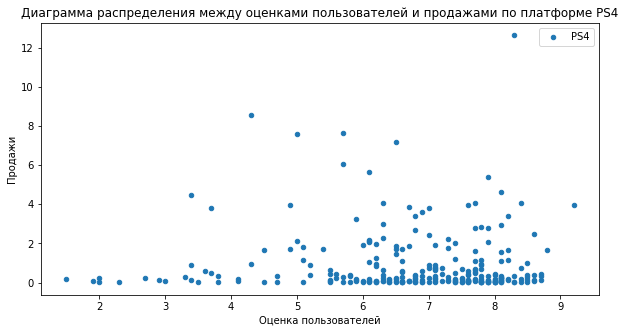

Корреляция между оценками пользователей и продажами по платформе PS3  = 0.0023944027357566925


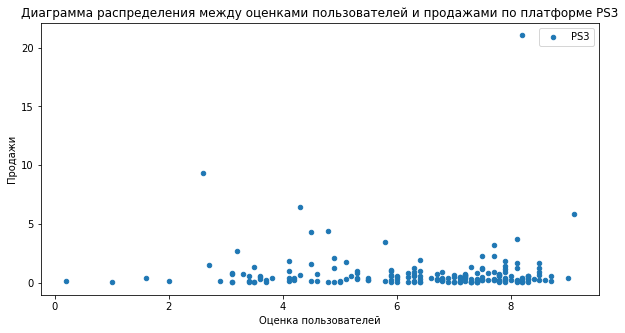

Корреляция между оценками пользователей и продажами по платформе XOne  = -0.06892505328279414


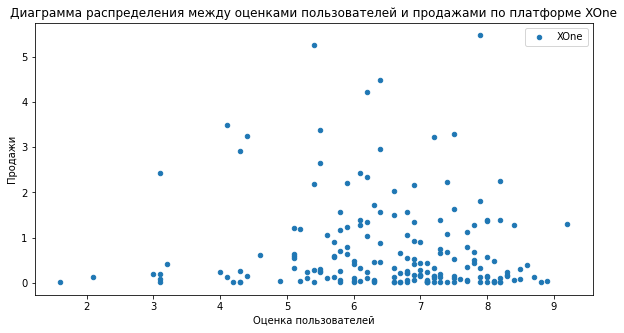

Корреляция между оценками пользователей и продажами по платформе 3DS  = 0.24150411773563016


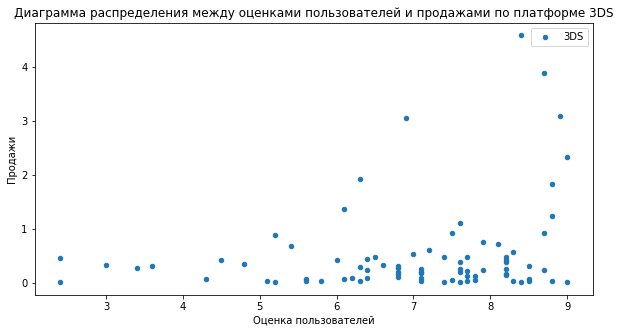

Корреляция между оценками пользователей и продажами по платформе X360  = -0.011742185147181342


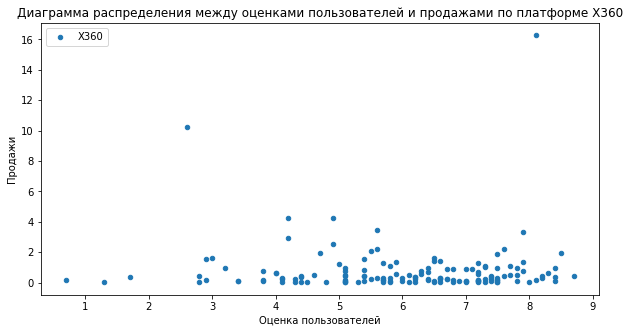

In [63]:
for name in act_slice_top:
    (
    act_slice
        .query('platform == @name and user_score > -1')
        .plot(x='user_score', y='total_sales', kind='scatter', figsize=(10, 5))
    )
    plt.title(f'Диаграмма распределения между оценками пользователей и продажами по платформе {name}')
    plt.xlabel('Оценка пользователей')
    plt.ylabel('Продажи')
    plt.legend([name])
    print(f'Корреляция между оценками пользователей и продажами по платформе {name}  =', 
          act_slice
          .query('platform == @name and user_score > -1')['user_score']
          .corr(act_slice.query('platform == @name and user_score > -1')['total_sales']))
    plt.show()

**ВЫВОД:**

При анализе разных платформ диаграммы распределения показывают на слабую связь между оценкой пользователей и продажами, коэффициент корреляции так же показывает слабую связь.

Построим диаграмму распределения и вычислим корреляцию между оценкой критиков и продажами в разрезе отдельных платформ

Корреляция между оценками критиков и продажами по платформе PS4  = 0.40656790206178095


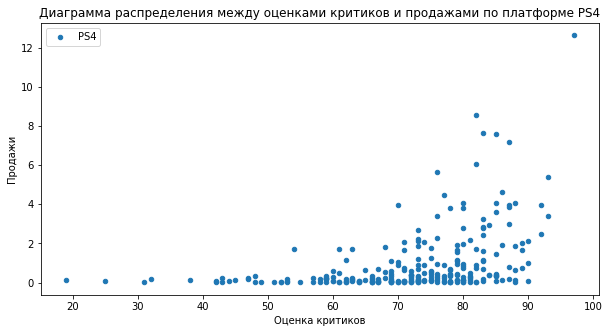

Корреляция между оценками критиков и продажами по платформе PS3  = 0.3342853393371919


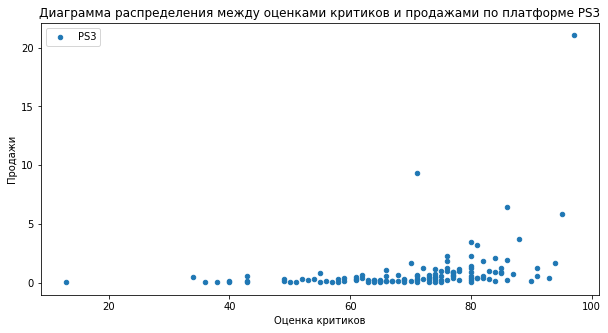

Корреляция между оценками критиков и продажами по платформе XOne  = 0.4169983280084017


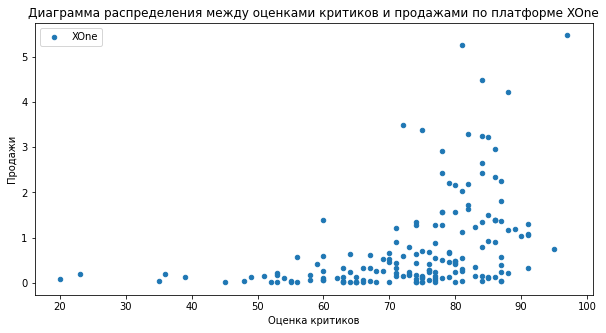

Корреляция между оценками критиков и продажами по платформе 3DS  = 0.3570566142288103


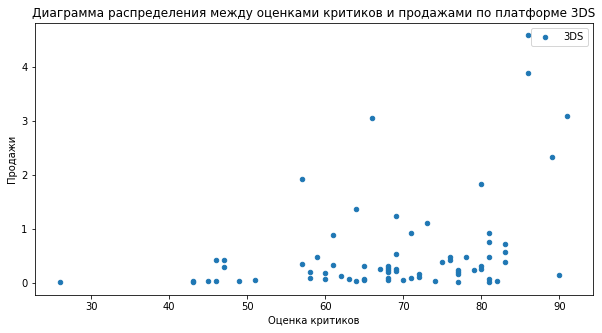

Корреляция между оценками критиков и продажами по платформе X360  = 0.3503445460228664


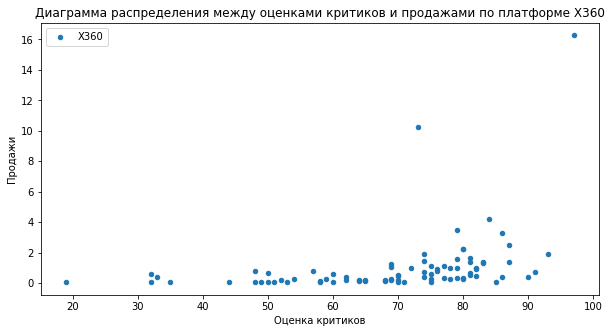

In [64]:
for name in act_slice_top:
    (
    act_slice
        .query('platform == @name and critic_score > -1')
        .plot(x='critic_score', y='total_sales', kind='scatter', figsize=(10, 5))
    )
    plt.title(f'Диаграмма распределения между оценками критиков и продажами по платформе {name}')
    plt.xlabel('Оценка критиков')
    plt.ylabel('Продажи')
    plt.legend([name])
    print(f'Корреляция между оценками критиков и продажами по платформе {name}  =', 
          act_slice
          .query('platform == @name and critic_score > -1')['critic_score']
          .corr(act_slice.query('platform == @name and critic_score > -1')['total_sales']))
    plt.show()

**ВЫВОД:**

При анализе разных платформ диаграммы распределения показывают бОльшую связь между оценкой критиков и продажами в сравнении с влиянием оценок пользователей. Коэффициент корреляции принимает значения от 0,32 до 0,42.


**ВЫВОД ПО ОЦЕНКЕ ВЛИЯНИЯ ОТЗЫВОВ НА ПРОДАЖИ:**

Коэффициент корреляции между оценками критиков и продажами по платформе PS4  = 0.4
Коэффициент корреляции между оценками пользователей и продажами по платформе PS4  = - 0.03

На всех платформах рейтинги критиков имеют положительное влияние на продажи, в то время как оценки игроков оказывают слабое влияние на продажи.

### Общее распределение игр по жанрам

Выявим самые прибыльные жанры.

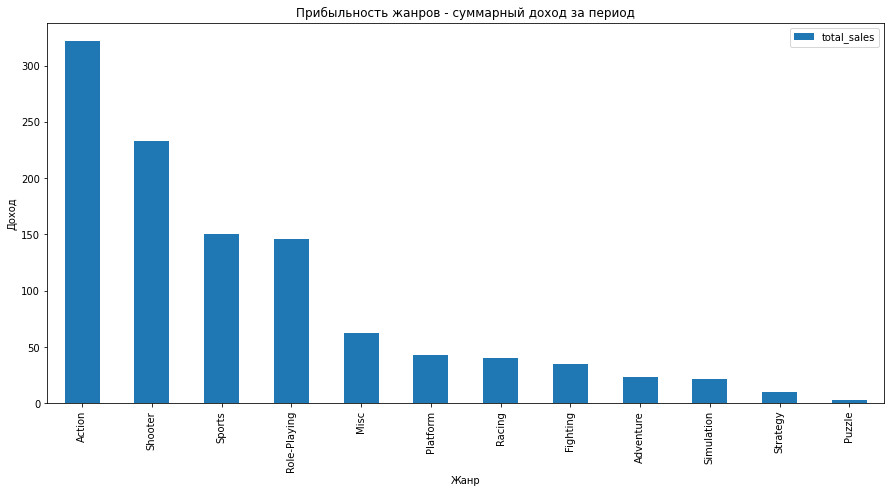

In [65]:
(
    act_slice
    .pivot_table(index='genre', values='total_sales', aggfunc='sum')
    .sort_values('total_sales', ascending=False)
    .plot(kind='bar', y='total_sales', figsize=(15, 7), legend=False,)
)
 
plt.title('Прибыльность жанров - суммарный доход за период')
plt.xlabel('Жанр')
plt.ylabel('Доход')
plt.legend() 
plt.show()

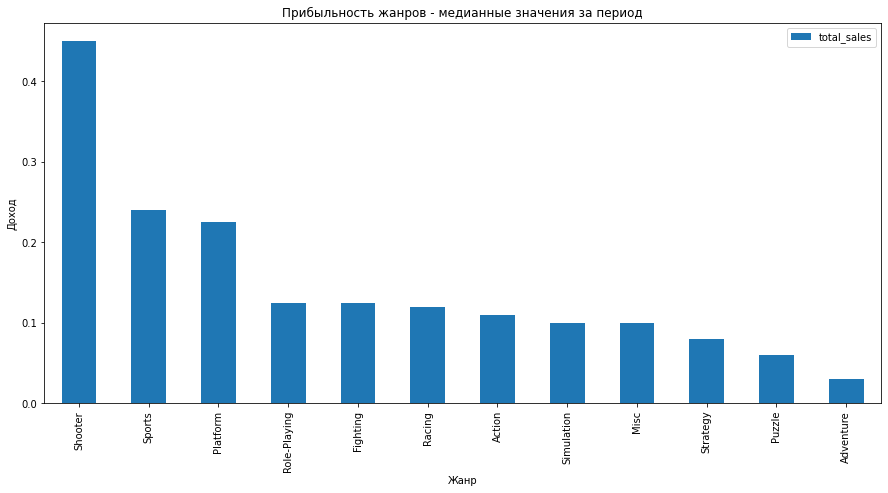

In [66]:
(
    act_slice
    .pivot_table(index='genre', values='total_sales', aggfunc='median')
    .sort_values('total_sales', ascending=False)
    .plot(kind='bar', y='total_sales', figsize=(15, 7), legend=False,)
)
 
plt.title('Прибыльность жанров - медианные значения за период')
plt.xlabel('Жанр')
plt.ylabel('Доход')
plt.legend() 
plt.show()

**ВЫВОД:**

Наибольший доход приносят жанры Action и Shooter. Так же стоит обратить внимание на жанры Sports и Role-Playing.
Анализ медианных значений показывает высоки уровень дохода по жанрам Shooter и Sport.

**ВЫВОД ПО ИССЛЕДОВАТЕЛЬСКОМУ АНАЛИЗУ ДАННЫХ:**

Рассматриваемый период выпуска игр - с 1980 по 2016 год. Рост количества выпускаемых игр приходится на 1994 год. И продолжается до выходит на свой максимум в 2008, далее наблюдается спад до 2012 года. После чего количество выпускаемых игр стабилизируется. Для исследования возьмем период в 7 лет, так как морально и технически устаревшие игры вряд ли сильно заинтересуют потребителя.

Характерный срок появления новых и исчезновения старых платформ, судя по графикам, 10 лет (на этапе роста и зрелости продукта -5 лет). Таким образом, актуальный период работы всех платформ 3 - 5 лет.

По итогам анализа дохода от продаж игр в актуальном периоде выявлено 5 потенцально прибыльных платформ:

PS4
PS3
XOne
3DS
X360
Согласно полученному графику в 2016 году наблюдается снижение продаж по всем платформам. Однако тенденция к понижению дохода у платформ PS4 и XOne появилась в 2015 году, в то время как у остальных платформ стойкая тенденция к снижению дохода наблюдается на протяжении всего актуального периода (с 2013 г).

Отнесем к лидерам PS4 и XOne.

Присутствуют выбросы значений практически по глобальным продажам игр по всем платформам. Медианное значение - 0,11. У многих платформ, в том числе входящих в 5 потенцально прибыльных, это значение выше. Аналогичная ситуация наблюдается при оценке межквартильного разброса.

Коэффициент корреляции между оценками критиков и продажами по платформе PS4 = 0.4 Коэффициент корреляции между оценками пользователей и продажами по платформе PS4 = - 0.03

Диаграммы рассеяния показывают слабую зависимость продаж от оценок пользователей и критиков. Это подтверждает и рассчитанные коэффициенты Пирсона.

Наибольший доход приносят жанры Action и Shooter. Так же стоит обратить внимание на жанры Sports и Role-Playing.
Анализ медианных значений показывает высоки уровень дохода по жанрам Shooter и Sport.

## ПОРТРЕТ ПОЛЬЗОВАТЕЛЯ КАЖДОГО РЕГИОНА

In [67]:
region = ['na_sales', 'eu_sales', 'jp_sales']

### Cамые популярные платформы (топ - 5) пользователей каждого региона (NA, EU, JP) 

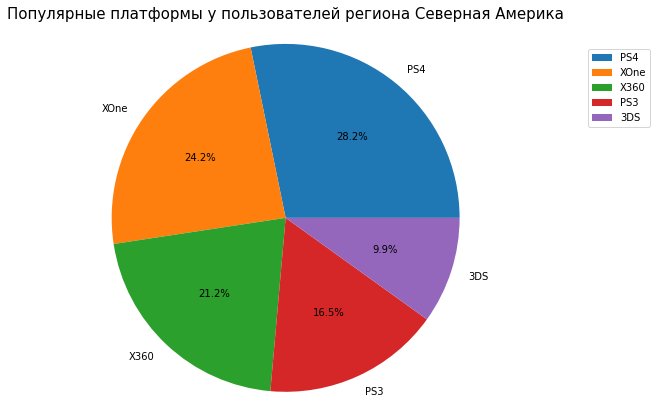

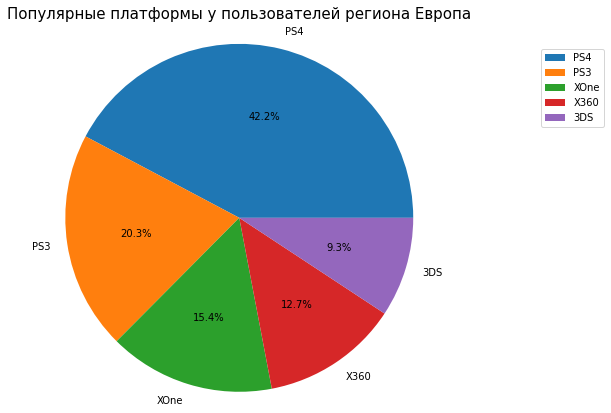

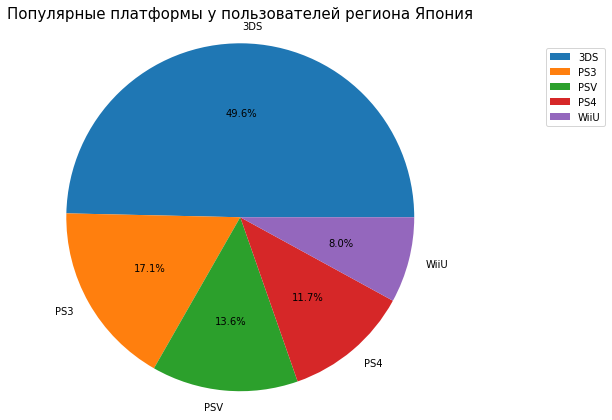

In [68]:
for r in region:
    (
        act_slice
        .pivot_table(index = 'platform', values = r,aggfunc = 'sum' )
        .sort_values(by = r, ascending = False)
        .head(5)
        .plot(y = r, kind = 'pie', radius = 2,  autopct='%1.1f%%')
    )

    if r == 'na_sales':
        reg_sales = 'Северная Америка'
    elif r == 'eu_sales':
        reg_sales = 'Европа'
    elif r == 'jp_sales':
        reg_sales = 'Япония'
    
    plt.title(f'Популярные платформы у пользователей региона {reg_sales}',fontsize=15, pad=90)
    plt.ylabel(" ")
    plt.legend(bbox_to_anchor=(2.2,1.3))
    plt.show()

**ВЫВОД:**

У пользователей Северной Америки наибольшей популярностью пользуются платформы PS4(28.2%), XOne(24,1%) и X360(21.2%)

У пользователей Европы наибольшей популярностью пользуется платформа PS4(42.2%)

У пользователей Японии наибольшей популярностью пользуется платформа 3DS(49.6%)

### Cамые популярные жанры (топ - 5) пользователей каждого региона (NA, EU, JP) 

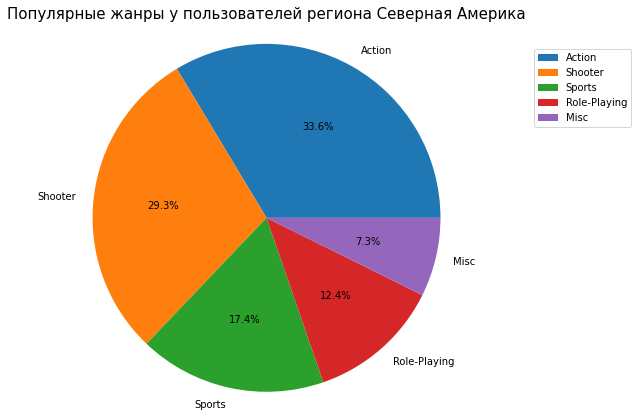

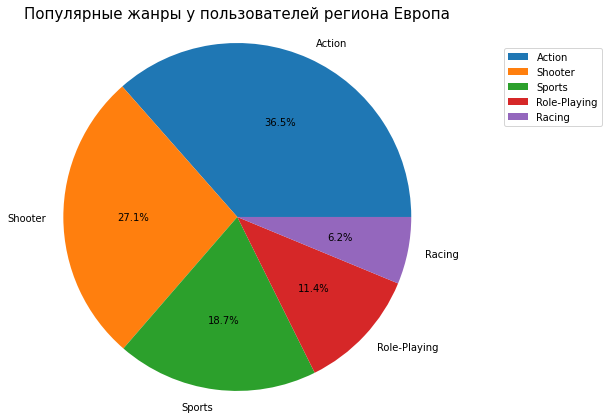

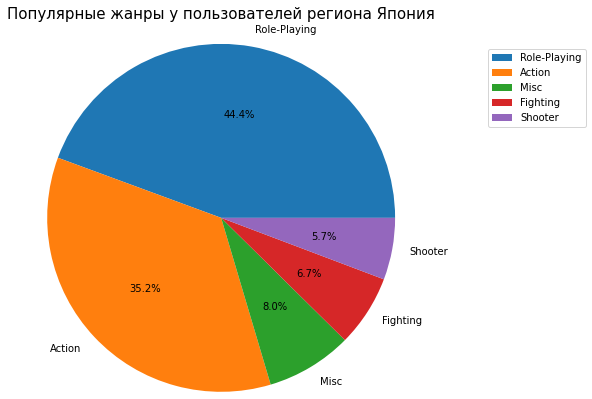

In [69]:
for r in region:
    (
        act_slice
        .pivot_table(index = 'genre', values = r,aggfunc = 'sum' )
        .sort_values(by = r, ascending = False)
        .head(5)
        .plot(y = r, kind = 'pie', radius = 2,  autopct='%1.1f%%')
    )

    if r == 'na_sales':
        reg_sales = 'Северная Америка'
    elif r == 'eu_sales':
        reg_sales = 'Европа'
    elif r == 'jp_sales':
        reg_sales = 'Япония'
    
    plt.title(f'Популярные жанры у пользователей региона {reg_sales}',fontsize=15, pad=90)
    plt.ylabel(" ")
    plt.legend(bbox_to_anchor=(2.2,1.3))
    plt.show()

**ВЫВОД:**

У пользователей Северной Америки наибольшей популярностью пользуются игры жанра Action(33.6%) и Shooter (29,3%).

У пользователей Европы наибольшей популярностью пользуются игры жанра Action(36.5%) и Shooter (27,1%).

У пользователей Японии наибольшей популярностью пользуются игры жанра Role-Playing(44.4%) и Action (35,2%).

### Влияние рейтинга ESRB на продажи в отдельном регионе

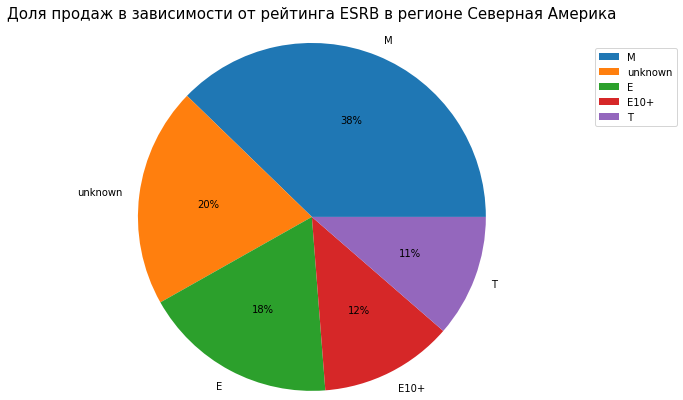

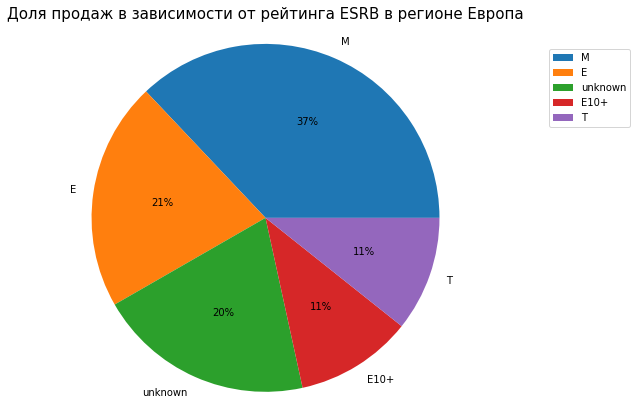

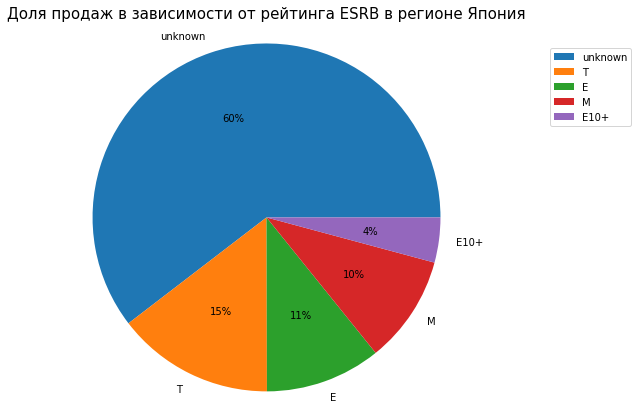

In [70]:
for r in region:
    (
        act_slice
        .pivot_table(index='rating', values=r, aggfunc='sum')
        .sort_values(by = r, ascending=False)
        .plot(y=r, kind='pie', radius = 2, autopct='%1.0f%%')
        .set(ylabel=" ")
    )
    if r == 'na_sales':
        reg_sales = 'Северная Америка'
    elif r == 'eu_sales':
        reg_sales = 'Европа'
    elif r == 'jp_sales':
        reg_sales = 'Япония'
        
    plt.title(f'Доля продаж в зависимости от рейтинга ESRB в регионе {reg_sales}',fontsize=15, pad=90)
    plt.legend(bbox_to_anchor=(2.2,1.3))
    plt.show()

**ВЫВОД:**

Среди пользователей Японии не наблюдается ярко выраженной зависимости продаж от рейтинга ESRB. Однако, следует учесть, что в 60% случаев рейтинг в исходных данных не указан. Достоверно оценить зависимость невозможно.

В Северной Америке и Европе наблюдается выраженная зависимость продаж от рейтинга ESRB. Наибольший доход получен от игр с рейтингом M(17+) около 37,5%, далее доходность снижается соответственно: Е (0+) - 19%, E10+ - 11,5%, T(13+) - 11%.

## ПРОВЕРКА ГИПОТЕЗ

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

- Нулевая гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC равны
- Альтернативная гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC не равны

In [71]:
hyp_score_xbox = act_slice.query('platform == "XOne" and user_score > -1')
hyp_score_xbox['user_score'].describe()

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

In [72]:
hyp_score_pc = act_slice.query('platform == "PC" and user_score > -1')
hyp_score_pc['user_score'].describe()

count    155.000000
mean       6.269677
std        1.742381
min        1.400000
25%        5.300000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

Имеем две независимые выборки. Проверяем двустороннюю гипотезу методом scipy.stats.ttest_ind.
Стандартное отклонение, а соответственно и дисперсии двух выборок отличается. Учтем это при проверке гипотезы. Выберем уровень статистической значимости 5%.

In [73]:
alpha = 0.05

results = st.ttest_ind(
    hyp_score_xbox['user_score'], 
    hyp_score_pc['user_score'],
    equal_var=False,
    alternative='two-sided')
print('p-значение', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение 0.14759594013430463
Не отвергаем нулевую гипотезу


**ВЫВОД:**

Нулевая гипотеза не отвергнута. Есть основания полагать, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

- Нулевая гипотеза - Средние пользовательские рейтинги жанров Action и Sports равны
- Альтернативная гипотеза - Средние пользовательские рейтинги жанров Action и Sports не равны

In [74]:
hyp_score_action = act_slice.query('genre == "Action" and user_score > -1')
hyp_score_action['user_score'].describe()

count    389.000000
mean       6.837532
std        1.330173
min        2.000000
25%        6.300000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

In [75]:
hyp_score_sports = act_slice.query('genre == "Sports" and user_score > -1')
hyp_score_sports['user_score'].describe()

count    160.000000
mean       5.238125
std        1.783427
min        0.200000
25%        4.100000
50%        5.500000
75%        6.500000
max        8.800000
Name: user_score, dtype: float64

Имеем две независимые выборки. Проверяем двустороннюю гипотезу методом scipy.stats.ttest_ind.
Стандартное отклонение, а соответственно и дисперсии двух выборок отличается. Учтем это при проверке гипотезы. Выберем уровень статистической значимости 5%.

In [76]:
alpha = 0.05

results = st.ttest_ind(
    hyp_score_action['user_score'], 
    hyp_score_sports['user_score'],
    equal_var=False,
    alternative='two-sided')
print('p-значение', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение 1.4460039700704315e-20
Отвергаем нулевую гипотезу


**ВЫВОД:**

Нулевая гипотеза отвергнута. Есть основания полагать, что Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

## ОБЩИЙ ВЫВОД:


**АНАЛИЗ ОБЩЕЙ ИНФОРМАЦИИ**

- Анализируемый датафрейм содержит 16715 строк. Требуется Обработка пропусков, преобразование типов данных, приведение наименований столбцов к нижнему регистру.


**ПРЕДОБРАБОТКА ДАННЫХ**

- Проведена замена наименований столбцов (приведены к нижнему регистру);
- Обработаны пропуски:

        Удалены:

        2 пропуска в столбце name - название игры
        2 пропуска в столбце genre - жанр игры
        269 пропусков в столбце year_of_release — год выпуска

        Проведена замена пропусков на "-1": 
        сritic_score - оценка критиков (8578) 
        user_score - оценка пользователей (6701)
        
        Проведена замена пропусков на "unknown":
        rating - рейтинг от организации ESRB(6766) 
        
    Вероятная причина пропусков - технический сбои при объединении данных из разных источников, отсутствие внесенной информации(человеческий фактор).


- Преобразованы типы данных:

        В столбце year_of_release — год выпуска тип данных - float64 преобразован в int.
        В столбце critic_score — оценка критиков тип данных - float64 преобразован в int.
        В столбце user_score - оценка пользователей тип данных - object преобразован  в float.
    В данных оценок пользователей содержится аббревиатура "tbd". 2376 строк. Замена такого количества данных на медианные значения может повлиять на объективность картины по данным показателям. Удалять строки так же нельзя. Проведем замену пропусков на "-1".
    
    
- Проведена проверка на дубликаты. Явные дубликаты отсутствуют

- Расчитаны суммарные продажи во всех регионах. Добавлен отдельный столбец total_sales.


**ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ**

Рассматриваемый период выпуска игр - с 1980 по 2016 год. Рост количества выпускаемых игр приходится на 1994 год. И продолжается до выходит на свой максимум в 2008, далее наблюдается спад до 2012 года. После чего количество выпускаемых игр стабилизируется. Для исследования возьмем период в 7 лет, так как морально и технически устаревшие игры вряд ли сильно заинтересуют потребителя.

Характерный срок появления новых и исчезновения старых платформ, судя по графикам, 10 лет (на этапе роста и зрелости продукта -5 лет). Таким образом, актуальный период работы всех платформ 3 - 5 лет.

По итогам анализа дохода от продаж игр в актуальном периоде выявлено 5 потенцально прибыльных платформ:

PS4
PS3
XOne
3DS
X360
Согласно полученному графику в 2016 году наблюдается снижение продаж по всем платформам. Однако тенденция к понижению дохода у платформ PS4 и XOne появилась в 2015 году, в то время как у остальных платформ стойкая тенденция к снижению дохода наблюдается на протяжении всего актуального периода (с 2013 г).

Отнесем к лидерам PS4 и XOne.

Присутствуют выбросы значений практически по глобальным продажам игр по всем платформам. Медианное значение - 0,11. У многих платформ, в том числе входящих в 5 потенцально прибыльных, это значение выше. Аналогичная ситуация наблюдается при оценке межквартильного разброса.

Коэффициент корреляции между оценками критиков и продажами по платформе PS4 = 0.4 Коэффициент корреляции между оценками пользователей и продажами по платформе PS4 = - 0.03

Диаграммы рассеяния показывают слабую зависимость продаж от оценок пользователей и критиков. Это подтверждает и рассчитанные коэффициенты Пирсона.

Наибольший доход приносят жанры Action и Shooter. Так же стоит обратить внимание на жанры Sports и Role-Playing.
Анализ медианных значений показывает высоки уровень дохода по жанрам Shooter и Sport.

**ПОРТРЕТ ПОЛЬЗОВАТЕЛЯ КАЖДОГО РЕГИОНА**

***Северная Америка:***

- популярные платформы: PS4(28.2%), XOne(24,1%) и X360(21.2%)
- популярные жанры: Action(33.6%) и Shooter (29,3%)

***Европа:***

- популярные платформы: PS4(42.2%)
- популярные жанры: Action(33.6%) и Shooter (29,3%)

***Япония:***

- популярные платформы: 3DS(49.6%)
- популярные жанры: Role-Playing(44.4%) и Action (35,2%).

Среди пользователей Японии не наблюдается ярко выраженной зависимости продаж от рейтинга ESRB. Однако, следует учесть, что в 60% случаев рейтинг в исходных данных не указан. Достоверно оценить зависимость невозможно.

В Северной Америке и Европе наблюдается выраженная зависимость продаж от рейтинга ESRB. Наибольший доход получен от игр с рейтингом M(17+) около 37,5%, далее доходность снижается соответственно: Е (0+) - 19%, E10+ - 11,5%, T(13+) - 11%.


**ПРОВЕРКА ГИПОТЕЗ**

- Одинаковые ли средние пользовательские рейтинги платформ Xbox One и PC?

Нулевая гипотеза не отвергнута. ***Есть основания полагать, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.***

- Различаются ли средние пользовательские рейтинги жанров Action и Sports?

Нулевая гипотеза отвергнута. ***Есть основания полагать, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.***


**РЕКОМЕНДАЦИИ**

В процессе исследования выявилены закономерности, определяющие успешность компьютерной игры, основываясь на исторических данных о продажах игр, оценке пользователей и экспертов, жанрах и платформах (например, Xbox или PlayStation).

Потенциально популярным продуктом для планирования рекламной кампании являются компьютерные игры в жанрах Action, Shooter и Sport с рейтингом M на платформе PS4 в Северной Америке и Европе, а в Японии жанры Role-Playing и Action на платформе 3DS.